**<center><h1> Hindi Tweets Sentiment Analysis </h1></center>**

**About the Dataset:<br>**
**The dataset comprises Hindi tweets from Dainik Bhaskar, one of India's largest Hindi-language daily newspapers owned by the Dainik Bhaskar Group. Dainik Bhaskar is ranked 3rd in the world by circulation, and it is the largest newspaper in India by circulation. It was established in Bhopal in 1958 and expanded in 1983 with the launch of the Indore edition. The Dainik Bhaskar Group operates in 12 states with 65 editions in Hindi, Marathi, and Gujarati.**

**The dataset contains tweets from 24/10/2019 to 14/09/2020. It consists of 22,000 rows, representing individual tweets, and 12 columns providing various information about each tweet.**

**Columns are:**

**Date: The date of the tweet<br>**
**Username: The username of the tweeter<br>**
**To: Users that the tweet is a reply to (if applicable)<br>**
**Replies: The number of replies to the tweet<br>**
**Retweets: The number of retweets received by the tweet<br>**
**Favorites: The number of times the tweet was favorited<br>**
**Text: The content of the tweet<br>**
**Geo: The geolocation associated with the tweet<br>**
**Mentions: Users mentioned in the tweet (if any)<br>**
**Hashtags: Hashtags used in the tweet (if any)<br>**
**ID: The unique identifier of the tweet<br>**
**Permalink: A permanent link or URL that points to the specific tweet in the dataset**<br><br><br>
**The dataset provides valuable insights into the tweets published by Dainik Bhaskar during the specified timeframe, including engagement metrics, user interactions, and textual content.**







# 1. Install dependencies

In [1]:
!pip install -q transformers tweepy wordcloud matplotlib
import pandas as pd
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.3 MB/s eta 0:00:00


# 2. Reading the Data

In [2]:
font_path = "/path/to/hindi/font.ttf"#Setting the font path to hindi for displaying it in the word cloud properly
data = pd.read_csv("/content/DainikBhaskar.csv")


# 3. EDA

In [3]:
data.head()#Displaying first few lines

date       username   to  replies  retweets  favorites  \
0  2020-09-14 15:30:01  DainikBhaskar  NaN        2         1         21   
1  2020-09-14 15:00:00  DainikBhaskar  NaN        0         4         62   
2  2020-09-14 14:30:00  DainikBhaskar  NaN        2         9        101   
3  2020-09-14 14:10:00  DainikBhaskar  NaN        3        23        217   
4  2020-09-14 13:57:20  DainikBhaskar  NaN        9        20        185   

                                                text  geo  \
0  भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉ...  NaN   
1  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा म...  NaN   
2  अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना क...  NaN   
3  चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पै...  NaN   
4  कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैं...  NaN   

                                          mentions  \
0                      @NCRBHQ @AmitShah @PMOIndia   
1                                              NaN   
2                                 @realDonaldTrump   
3                @adgpi @DefenceMinIndia @PMOIndia   
4  @KanganaTeam @OfficeofUT @AUThackeray @ShivSena   

                                   hashtags                   id  \
0                                 #ActOfGod  1305529239941328898   
1  #SabrimalaTemple #CoronaUpdatesOnBhaskar  1305521689736785921   
2                   #CoronaUpdatesOnBhaskar  1305514138538594305   
3          #IndiaChinaBorderTension #Ladakh  1305509103876403201   
4              #SushantSinghRajputDeathCase  1305505919162171392   

                                           permalink  
0  https://twitter.com/DainikBhaskar/status/13055...  
1  https://twitter.com/DainikBhaskar/status/13055...  
2  https://twitter.com/DainikBhaskar/status/13055...  
3  https://twitter.com/DainikBhaskar/status/13055...  
4  https://twitter.com/DainikBhaskar/status/13055...

In [4]:
data.date.max()

'2020-09-14 15:30:01'

In [5]:
data.date.min()

'2019-10-24 13:16:43'

In [6]:
data.shape# #Understanding the dimension of the data

(22000, 12)

In [7]:
data.to.isnull().sum() # To identify the null values in the 'to' column

21843

<b>Inference</b>: 21483/2000 rows in the feature is null values. 

In [8]:
data.to.unique() #To see the unique values in the 'to' column

array([nan, 'DainikBhaskar', 'ANI', 'narendramodi', 'RahulGandhi',
       'PIB_India', 'rashtrapatibhvn', 'Binodkuma123', 'chintskap',
       'SwatiJaiHind', 'rautsanjay61', 'AjitPawarSpeaks'], dtype=object)

In [9]:
data.geo.isnull().sum() # To identify the null values in the 'geo' column

22000

<b>Inference</b>: All the values in the column 'geo' is null values.


In [10]:
drop_cols = ['geo','to']#We are dropping the columns that have almos whole null values.

In [11]:
data.drop(drop_cols,axis=1,inplace=True)#Dropping the cols

In [12]:
data['text'] = data['text'].str.replace(r'https.*', '', regex=True)#We are removing the hashtags and mentions from the 'text' column which contains the tweet so we can obtain the precise teweet
data['text'] 

0        भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉ...
1        केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा म...
2        अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना क...
3        चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पै...
4        कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैं...
                               ...                        
21995    हरियाणा नतीजे LIVE / भाजपा बहुमत से 6 सीट दूर ...
21996    18 राज्यों के उपचुनाव / उप्र की 11 विधानसभा सी...
21997    ओडिशा / कलेक्टर ने कहा- भूत का पता बताओ, 50 हज...
21998    LIVE / मोदी ने कहा- महाराष्ट्र-हरियाणा के मुख्...
21999    ब्रेकिंग न्यूज़: गोपाल कांडा के भाई गोविन्द का...
Name: text, Length: 22000, dtype: object

In [13]:

df = data.iloc[:22000]#We are taking only a subset of the data since the whole dataset is huge and might take long time to run
df.head()


date       username  replies  retweets  favorites  \
0  2020-09-14 15:30:01  DainikBhaskar        2         1         21   
1  2020-09-14 15:00:00  DainikBhaskar        0         4         62   
2  2020-09-14 14:30:00  DainikBhaskar        2         9        101   
3  2020-09-14 14:10:00  DainikBhaskar        3        23        217   
4  2020-09-14 13:57:20  DainikBhaskar        9        20        185   

                                                text  \
0  भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉ...   
1  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा म...   
2  अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना क...   
3  चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पै...   
4  कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैं...   

                                          mentions  \
0                      @NCRBHQ @AmitShah @PMOIndia   
1                                              NaN   
2                                 @realDonaldTrump   
3                @adgpi @DefenceMinIndia @PMOIndia   
4  @KanganaTeam @OfficeofUT @AUThackeray @ShivSena   

                                   hashtags                   id  \
0                                 #ActOfGod  1305529239941328898   
1  #SabrimalaTemple #CoronaUpdatesOnBhaskar  1305521689736785921   
2                   #CoronaUpdatesOnBhaskar  1305514138538594305   
3          #IndiaChinaBorderTension #Ladakh  1305509103876403201   
4              #SushantSinghRajputDeathCase  1305505919162171392   

                                           permalink  
0  https://twitter.com/DainikBhaskar/status/13055...  
1  https://twitter.com/DainikBhaskar/status/13055...  
2  https://twitter.com/DainikBhaskar/status/13055...  
3  https://twitter.com/DainikBhaskar/status/13055...  
4  https://twitter.com/DainikBhaskar/status/13055...

In [14]:
pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.5 MB/s eta 0:00:00


In [15]:
from transformers import pipeline#Importing the pipeline for sentiment analysis

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="LondonStory/txlm-roberta-hindi-sentiment")

In [16]:
# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in df.text:
    try: 
       
      content = tweet
      
      sentiment = sentiment_analysis(content)
      
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
      
      

    except: 
      pass


In [17]:
# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000) 
output = pd.DataFrame(tweets)


display(output)

tweet sentiment
0                                                                                                                                                                    भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉड' से हर साल 7,916 मौतें; 30 साल में 4.96 लाख की जान गई    LABEL_2
1                                                                                                     केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा मंदिर, 20 साल से कम और 50 साल से ज्यादा के लोग नहीं कर पाएंगे दर्शन, श्रद्धालुओं को 24 दिन क्वारैंटाइन करने का प्रस्ताव    LABEL_1
2                                                                                                                       अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना के सबसे ज्यादा मरीज, पर ट्रम्प बोले- मोदी ने मुझसे कहा कि आपने टेस्टिंग के मामले में कमाल का काम किया    LABEL_2
3                                                                                                          चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पैंगॉन्ग में भारत ने चीन की घुसपैठ नाकाम की, अहम चोटियों पर कब्जा किया; उधर चीनी अफसर ने काउंटर अटैक से मना कर दिया    LABEL_0
4                                                                                                                                   कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैंने आदित्य के साथ घूमने वाले सुशांत के हत्यारों का पर्दाफाश किया, इसी से उद्धव को परेशानी    LABEL_0
...                                                                                                                                                                                                                                                                     ...       ...
21995                                                                                                                                                                   हरियाणा नतीजे LIVE / भाजपा बहुमत से 6 सीट दूर रह गई, निर्दलियों की मदद से सरकार बनाने का दावा किया    LABEL_2
21996                                                                                                                                                          18 राज्यों के उपचुनाव / उप्र की 11 विधानसभा सीटों में से 7 भाजपा को; गुजरात के राधनपुर से अल्पेश ठाकोर हारे    LABEL_2
21997                                                                                                                                                                                                    ओडिशा / कलेक्टर ने कहा- भूत का पता बताओ, 50 हजार रुपए का इनाम पाओ    LABEL_2
21998                                                                                                                                                   LIVE / मोदी ने कहा- महाराष्ट्र-हरियाणा के मुख्यमंत्रियों की टीम ने ईमानदारी से काम किया, जनता ने फिर विश्वास जताया    LABEL_2
21999  ब्रेकिंग न्यूज़: गोपाल कांडा के भाई गोविन्द कांडा ने दिया भाजपा को समर्थन, बोले भाजपा में जाना हमारे लिए घर वापसी जैसा #AssemblyElections2019 #HaryanaAssemblyPolls2019 #HaryanaAssemblyPolls #ResultsWithBhaskar #ElectionResults2019 #HaryanaAssemblyElections2019   LABEL_2

[22000 rows x 2 columns]

In [18]:
#We are changing the output into the proper labels 
label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}
output['sentiment'] = output['sentiment'].replace(label_mapping)

In [19]:
# Show a tweet for each sentiment 
display(output[output["sentiment"] == 'Negative'].head(1))
display(output[output["sentiment"] == 'Neutral'].head(1))
display(output[output["sentiment"] == 'Positive'].head(1))


tweet sentiment
3  चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पैंगॉन्ग में भारत ने चीन की घुसपैठ नाकाम की, अहम चोटियों पर कब्जा किया; उधर चीनी अफसर ने काउंटर अटैक से मना कर दिया   Negative

tweet sentiment
1  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा मंदिर, 20 साल से कम और 50 साल से ज्यादा के लोग नहीं कर पाएंगे दर्शन, श्रद्धालुओं को 24 दिन क्वारैंटाइन करने का प्रस्ताव    Neutral

tweet sentiment
0  भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉड' से हर साल 7,916 मौतें; 30 साल में 4.96 लाख की जान गई   Positive

sentiment
Negative    7638
Neutral     7059
Positive    7303
dtype: int64


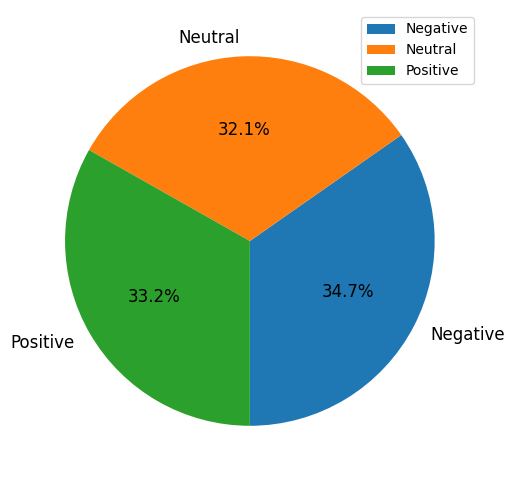

In [20]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = output.groupby(['sentiment']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.legend()
plt.show()

<b>Inference</b>: From this we can infer that **most number of tweets have a neutral sentiment** followed by positive and negative sentiment almost same number.

In [21]:
text_data = ' '.join(output['tweet'])#We are joining every tweet into a single string so we can plot a word cloud properly
text_data

'भास्कर डेटा स्टोरी:2015 से 2019 तक \'एक्ट ऑफ गॉड\' से हर साल 7,916 मौतें; 30 साल में 4.96 लाख की जान गई  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा मंदिर, 20 साल से कम और 50 साल से ज्यादा के लोग नहीं कर पाएंगे दर्शन, श्रद्धालुओं को 24 दिन क्वारैंटाइन करने का प्रस्ताव  अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना के सबसे ज्यादा मरीज, पर ट्रम्प बोले- मोदी ने मुझसे कहा कि आपने टेस्टिंग के मामले में कमाल का काम किया  चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पैंगॉन्ग में भारत ने चीन की घुसपैठ नाकाम की, अहम चोटियों पर कब्जा किया; उधर चीनी अफसर ने काउंटर अटैक से मना कर दिया  कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैंने आदित्य के साथ घूमने वाले सुशांत के हत्यारों का पर्दाफाश किया, इसी से उद्धव को परेशानी  भास्कर एक्सप्लेनर:चीन कैसे और क्यों कर रहा है 10,000 से ज्यादा भारतीयों की साइबर जासूसी? क्या है हाइब्रिड वारफेयर?  अब रजिस्ट्रेशन के लिए सिर्फ 2 दिन शेष ! दैनिक भास्कर जूनियर एडिटर-5 में आज ही रजिस्ट्रेशन कराएं ! अधिक जानकारी के लिए 91900-00097 नंबर पर मिस्ड कॉल दें या हमारी वेबसाइ

In [22]:
font_path = "/content/TiroDevanagariHindi-Regular.ttf"#Setting the font path to depict word cloud

In [23]:
stopword=open("stopwords.txt",'r')#We are creating stop words to make the hindi words in wordcloud
stop_words=[]
for i in stopword:
    i = re.sub('[\n]', '', i)
    stop_words.append(i)

stopwords = set(stop_words)


In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=font_path,prefer_horizontal=1,stopwords = stopwords,
min_font_size = 10).generate(text_data)#Creating the Word Cloud
wordcloud 

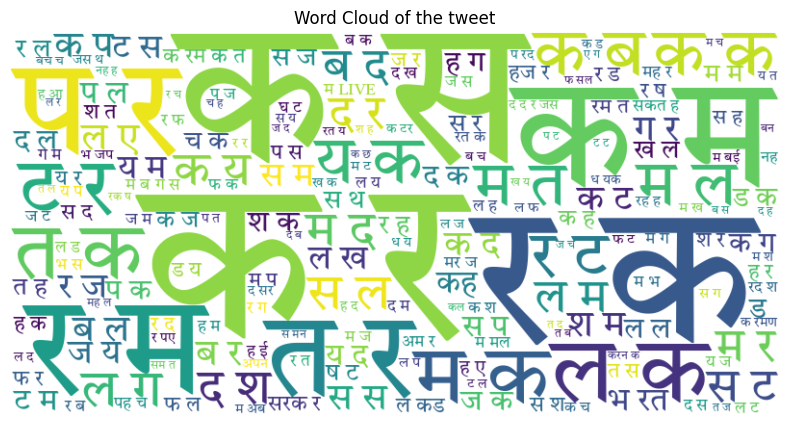

In [25]:
plt.figure(figsize=(10, 5))#Plotting the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of the tweet")
plt.show()





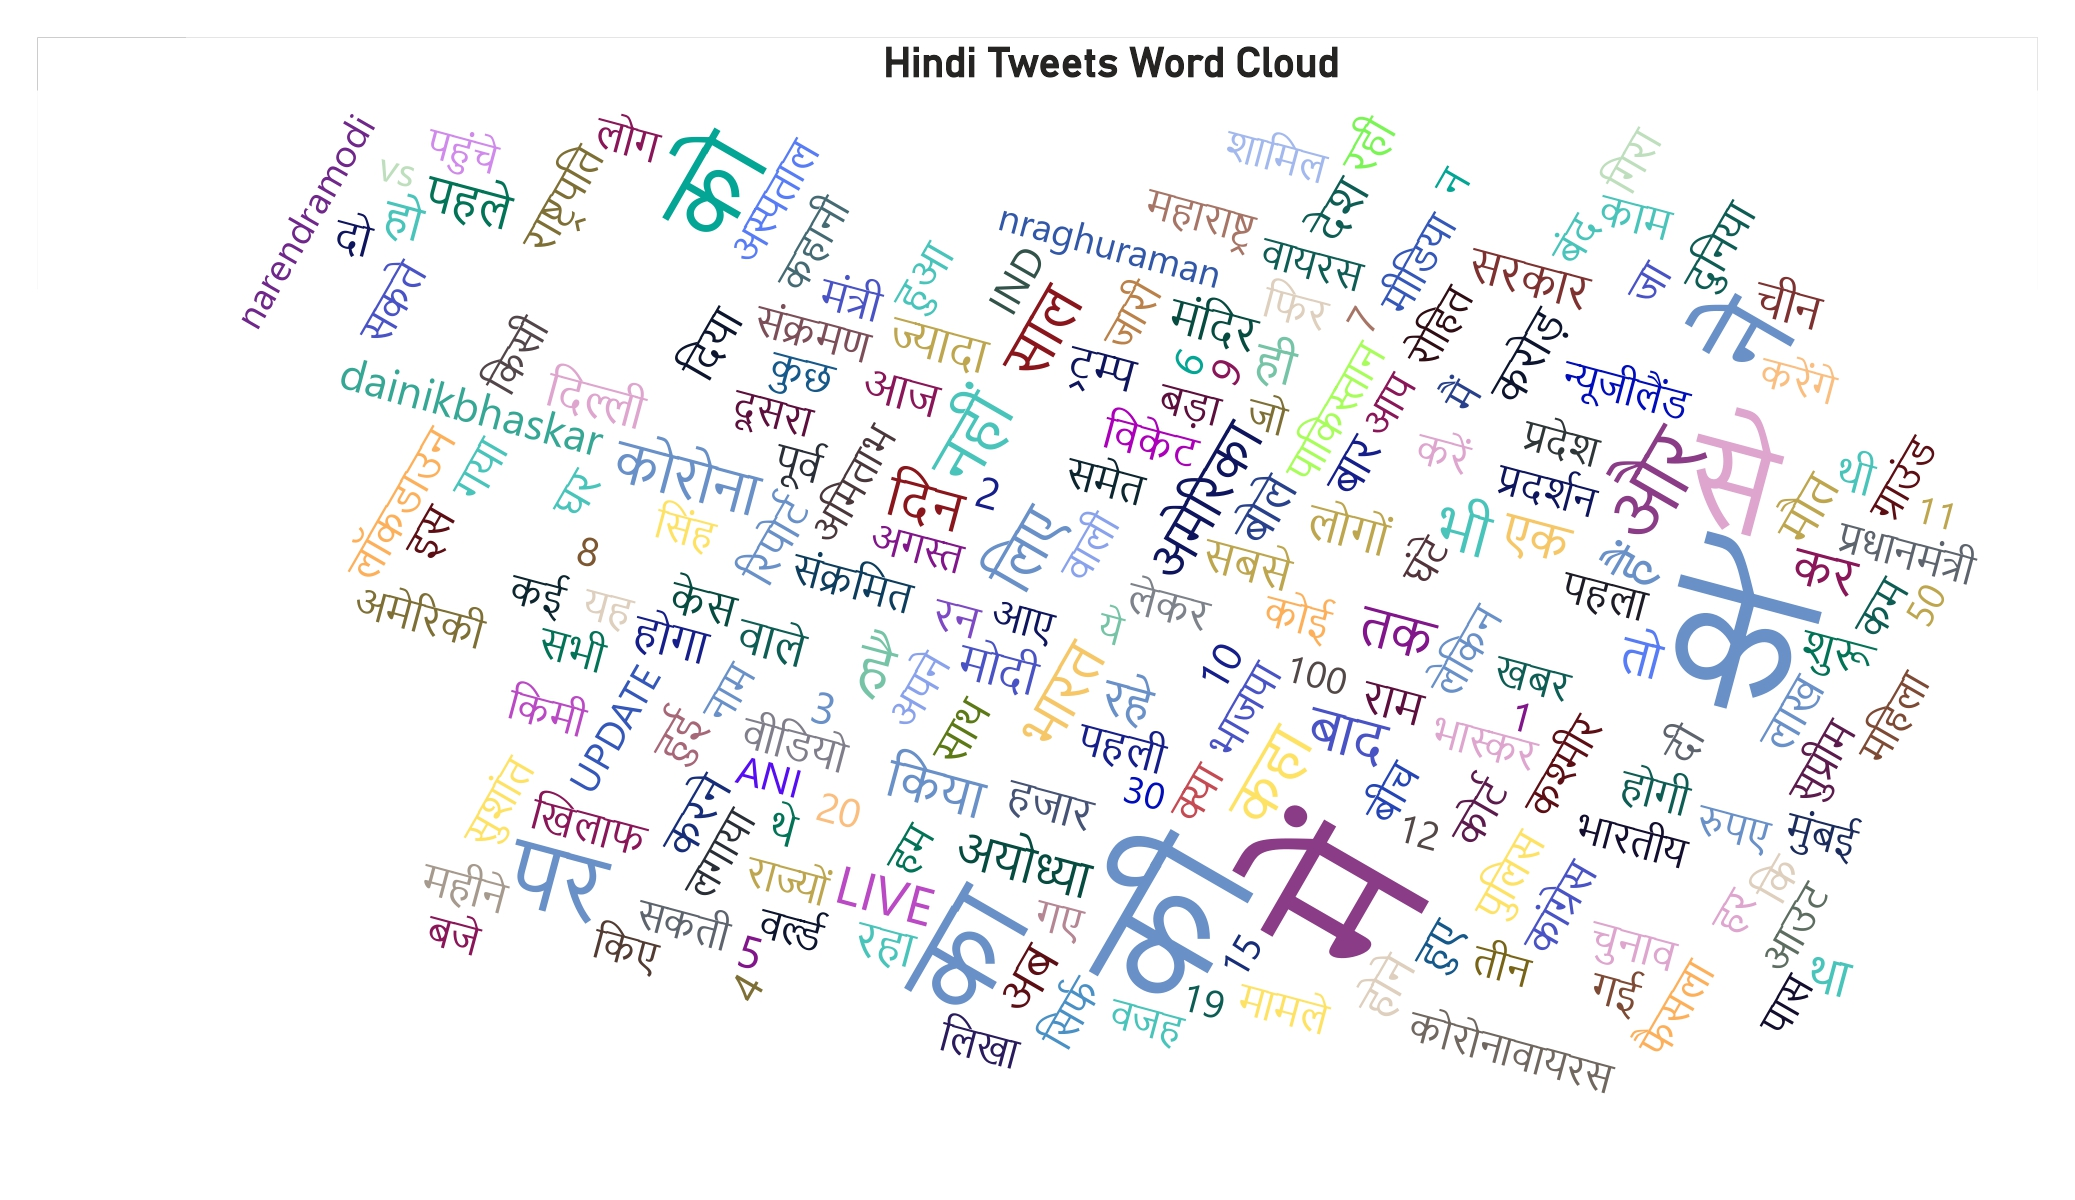

In [26]:
#Displaying a word cloud image of the same generated with Power BI
from IPython.display import Image#To display image

image_path = "/content/Hindi_Tweets_Sentiment_Analysis.jpeg_page-0001.jpg"  # Provide the path to your image file
Image(image_path)


In [27]:
output.head()

tweet sentiment
0                                                                 भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉड' से हर साल 7,916 मौतें; 30 साल में 4.96 लाख की जान गई   Positive
1  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा मंदिर, 20 साल से कम और 50 साल से ज्यादा के लोग नहीं कर पाएंगे दर्शन, श्रद्धालुओं को 24 दिन क्वारैंटाइन करने का प्रस्ताव    Neutral
2                    अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना के सबसे ज्यादा मरीज, पर ट्रम्प बोले- मोदी ने मुझसे कहा कि आपने टेस्टिंग के मामले में कमाल का काम किया   Positive
3       चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पैंगॉन्ग में भारत ने चीन की घुसपैठ नाकाम की, अहम चोटियों पर कब्जा किया; उधर चीनी अफसर ने काउंटर अटैक से मना कर दिया   Negative
4                                कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैंने आदित्य के साथ घूमने वाले सुशांत के हत्यारों का पर्दाफाश किया, इसी से उद्धव को परेशानी   Negative

In [28]:
df['Sentiment'] = output['sentiment']

<ipython-input-28-bee43593a5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = output['sentiment']


In [29]:
df.head()#Few lines of the updated dataframe

date       username  replies  retweets  favorites                                                                                                                                                                   text                                         mentions                                  hashtags                   id                                                     permalink Sentiment
0  2020-09-14 15:30:01  DainikBhaskar        2         1         21                                                                 भास्कर डेटा स्टोरी:2015 से 2019 तक 'एक्ट ऑफ गॉड' से हर साल 7,916 मौतें; 30 साल में 4.96 लाख की जान गई                       @NCRBHQ @AmitShah @PMOIndia                                 #ActOfGod  1305529239941328898  https://twitter.com/DainikBhaskar/status/1305529239941328898  Positive
1  2020-09-14 15:00:00  DainikBhaskar        0         4         62  केरल का सबरीमाला मंदिर:दीपावली के बाद खुलेगा मंदिर, 20 साल से कम और 50 साल से ज्यादा के लोग नहीं कर पाएंगे दर्शन, श्रद्धालुओं को 24 दिन क्वारैंटाइन करने का प्रस्ताव                                               NaN  #SabrimalaTemple #CoronaUpdatesOnBhaskar  1305521689736785921  https://twitter.com/DainikBhaskar/status/1305521689736785921   Neutral
2  2020-09-14 14:30:00  DainikBhaskar        2         9        101                    अमेरिकी राष्ट्रपति का नया दावा:US में कोरोना के सबसे ज्यादा मरीज, पर ट्रम्प बोले- मोदी ने मुझसे कहा कि आपने टेस्टिंग के मामले में कमाल का काम किया                                  @realDonaldTrump                   #CoronaUpdatesOnBhaskar  1305514138538594305  https://twitter.com/DainikBhaskar/status/1305514138538594305  Positive
3  2020-09-14 14:10:00  DainikBhaskar        3        23        217       चीनी सैनिकों में भारतीय जवानों जैसा दम नहीं:पैंगॉन्ग में भारत ने चीन की घुसपैठ नाकाम की, अहम चोटियों पर कब्जा किया; उधर चीनी अफसर ने काउंटर अटैक से मना कर दिया                 @adgpi @DefenceMinIndia @PMOIndia          #IndiaChinaBorderTension #Ladakh  1305509103876403201  https://twitter.com/DainikBhaskar/status/1305509103876403201  Negative
4  2020-09-14 13:57:20  DainikBhaskar        9        20        185                                कंगना vs शिवसेना:हिमाचल लौटकर बोलीं कंगना- मैंने आदित्य के साथ घूमने वाले सुशांत के हत्यारों का पर्दाफाश किया, इसी से उद्धव को परेशानी   @KanganaTeam @OfficeofUT @AUThackeray @ShivSena              #SushantSinghRajputDeathCase  1305505919162171392  https://twitter.com/DainikBhaskar/status/1305505919162171392  Negative

In [30]:
finding_1 = df.groupby('Sentiment')['favorites'].sum()#Finding the number of favorites for each sentiment
finding_1

Sentiment
Negative    655782
Neutral     710906
Positive    584896
Name: favorites, dtype: int64

<b>Inference:</b>We can understand that the **number of favorites is more** when the sentiment of the tweet is <b>Neutral</b>.

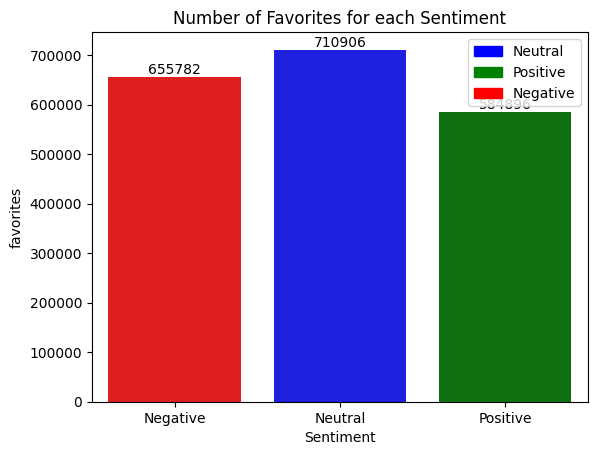

In [31]:
colors = ['red','blue', 'green']
ax = sns.barplot(x=finding_1 .index,y=finding_1,palette=colors)

ax.bar_label(ax.containers[0])
plt.title("Number of Favorites for each Sentiment")
# Display the plot
import matplotlib.patches as mpatches


legend_handles = [mpatches.Patch(color='blue', label='Neutral'),
                  mpatches.Patch(color='green', label='Positive'),
                  mpatches.Patch(color='red', label='Negative')]

plt.legend(handles=legend_handles)
plt.show()


In [32]:
finding_2 = df.groupby('Sentiment')['retweets'].sum()#Finding the number of retweets for each senitment
finding_2

Sentiment
Negative    92924
Neutral     85616
Positive    63096
Name: retweets, dtype: int64

<b>Inference:</b> We can infer that the **retweets are highest when the senitment of the tweet is neutral** follwed by Negative sentiment and Neutral.

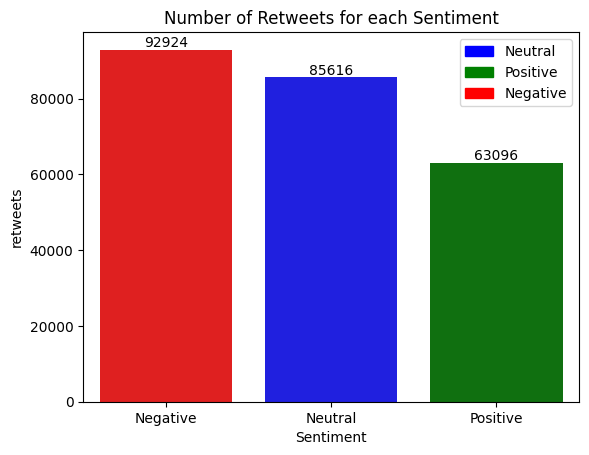

In [33]:
colors = ['red','blue', 'green']

ax = sns.barplot(x=finding_2 .index,y=finding_2,palette=colors)
legend_handles = [mpatches.Patch(color='blue', label='Neutral'),
                  mpatches.Patch(color='green', label='Positive'),
                  mpatches.Patch(color='red', label='Negative')]

plt.legend(handles =legend_handles )
ax.bar_label(ax.containers[0])
plt.title("Number of Retweets for each Sentiment")
# Display the plot

plt.show()


In [34]:
finding_3 = df.groupby('Sentiment')['replies'].sum()#Finding the number of replies for each Sentiment
finding_3

Sentiment
Negative    36710
Neutral     25802
Positive    20993
Name: replies, dtype: int64

**Inference:** We can understand that **Replies to a tweet are high when the sentiment of the tweet is Neutral** and then followed by Negative and Positive.

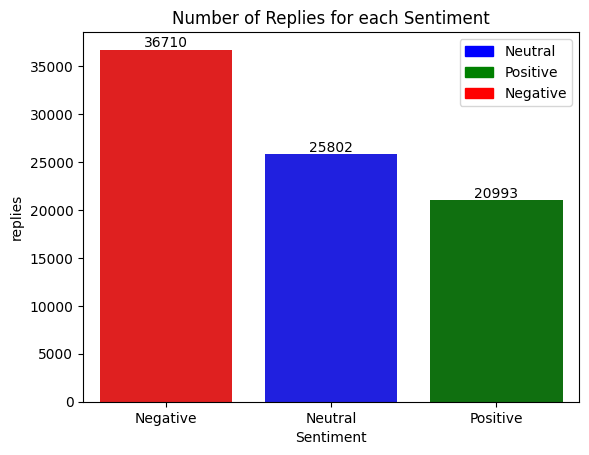

In [35]:
colors = ['red','blue', 'green']
ax = sns.barplot(x=finding_3 .index,y=finding_3,palette = colors)
ax.bar_label(ax.containers[0])
plt.title("Number of Replies for each Sentiment")
# Display the plot
legend_handles = [mpatches.Patch(color='blue', label='Neutral'),
                  mpatches.Patch(color='green', label='Positive'),
                  mpatches.Patch(color='red', label='Negative')]

plt.legend(handles =legend_handles )
plt.show()


In [36]:
df['mentions'].isnull().sum()#To see whether there is any null values in feature 'Mention'

7896

In [37]:
df['mentions'].fillna('Not Available',inplace=True)#Since there are null values we are replacing those null values with 'Not Available'

<ipython-input-37-83d667519cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mentions'].fillna('Not Available',inplace=True)#Since there are null values we are replacing those null values with 'Not Available'


In [38]:
tweet_join = df.loc[df['mentions'] != 'Not Available']#We are extracting all the rows that doesnt contain 'Not Available' i.e. We are only taking tweets that didnt had null values at first
ans  = ''.join(tweet_join['mentions'])#We are converting all the values in the 'mention' feature into a single string

In [39]:
wordcloud_2 = WordCloud(width=800, height=400, background_color='white',font_path=font_path).generate(ans)#Creating a word cloud for mention feature
wordcloud_2

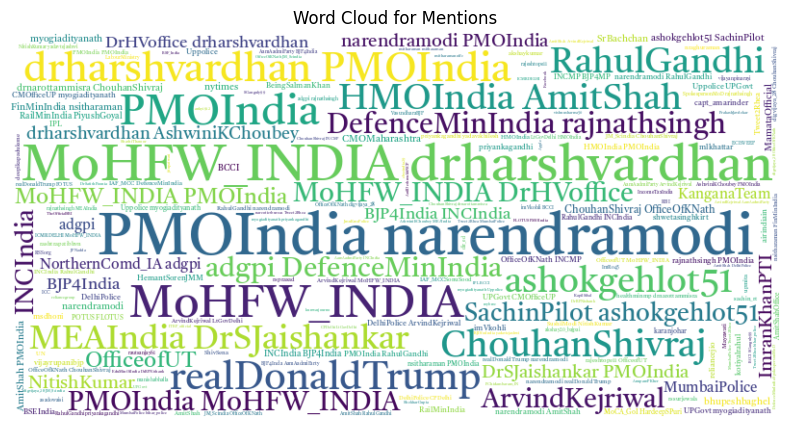

In [40]:
#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Mentions")
plt.show()





In [41]:
list_vals = ans.split("@")#Now we are splitting every mention into a list
list_values = [x.strip() for x in list_vals]#Removing the trailing and spaces
mentions = {}
for i in set(list_values):
  mentions[i] = ans.count(i)#Getting the count of every mention
mentions_df = pd.DataFrame(list(mentions.items()),columns=['Mention','Count']).iloc[1:]#Converting to a datafrane
print("The most number of mentions is for @",mentions_df.sort_values(by='Count', ascending=False).Mention.values[0])
print(mentions_df.sort_values(by='Count',ascending=False))#Sorting the values based on count



The most number of mentions is for @ PMOIndia
              Mention  Count
288          PMOIndia   2237
24        MoHFW_INDIA   1397
2542     narendramodi   1058
1558              WHO   1017
1757   ChouhanShivraj    810
...               ...    ...
1745    fertilitydost      1
1744   presidentdsgmc      1
1743  shailyIPSspeaks      1
792   HarperCollinsIN      1
1        soundarya_20      1

[2703 rows x 2 columns]


<b>Inference:</b> We can see that the most number of mentions is of @PMOIndia

In [42]:
#Creating a new dataframe
mention_results = pd.DataFrame(columns=['Mentions','Negative','Neutral','Positive'])
mention_results["Mentions"] =  mentions_df.Mention


for i in mentions_df.Mention:
    # Count the occurrences of each sentiment for the current mention
    count = df.groupby('Sentiment')['mentions'].apply(lambda x: x.str.contains(i).sum()).reset_index()

    # Assign the count values to the corresponding columns in mention_results
    mention_results.loc[mention_results['Mentions'] == i, 'Negative'] = count[count['Sentiment'] == 'Negative']['mentions'].values
    mention_results.loc[mention_results['Mentions'] == i, 'Neutral'] = count[count['Sentiment'] == 'Neutral']['mentions'].values
    mention_results.loc[mention_results['Mentions'] == i, 'Positive'] = count[count['Sentiment'] == 'Positive']['mentions'].values

print(mention_results)
  

             Mentions Negative Neutral Positive
1        soundarya_20        0       1        0
2          laurawbush        0       0        1
3     anuragkashyap72        8       3        2
4     cricketworldcup        7       2       20
5       JNUSUofficial        4       0        0
...               ...      ...     ...      ...
2699   ForceGurkha4x4        0       0        1
2700     LaghateParth        2       0        0
2701       BalrajSyal        0       0        1
2702        MFA_China        1       0        0
2703     KiritSomaiya        1       1        0

[2703 rows x 4 columns]


In [43]:
#Finding the mentions which have got highest count for each sentiment
mention_results['Positive'] = pd.to_numeric(mention_results['Positive'], errors='coerce')
mention_results['Negative'] = pd.to_numeric(mention_results['Negative'], errors='coerce')
mention_results['Neutral'] = pd.to_numeric(mention_results['Neutral'], errors='coerce')
print("The mention with highest count on positive sentiment is",mention_results.loc[mention_results['Positive'].idxmax()].Mentions,"with mentions ",mention_results.loc[mention_results['Positive'].idxmax()].Positive)
print("The mention with highest count on negative sentiment is",mention_results.loc[mention_results['Negative'].idxmax()].Mentions,"with mentions ",mention_results.loc[mention_results['Negative'].idxmax()].Negative)
print("The mention with highest count on neutral sentiment is",mention_results.loc[mention_results['Neutral'].idxmax()].Mentions,"with mentions ",mention_results.loc[mention_results['Neutral'].idxmax()].Neutral)

The mention with highest count on positive sentiment is PMOIndia with mentions  677
The mention with highest count on negative sentiment is PMOIndia with mentions  767
The mention with highest count on neutral sentiment is PMOIndia with mentions  788


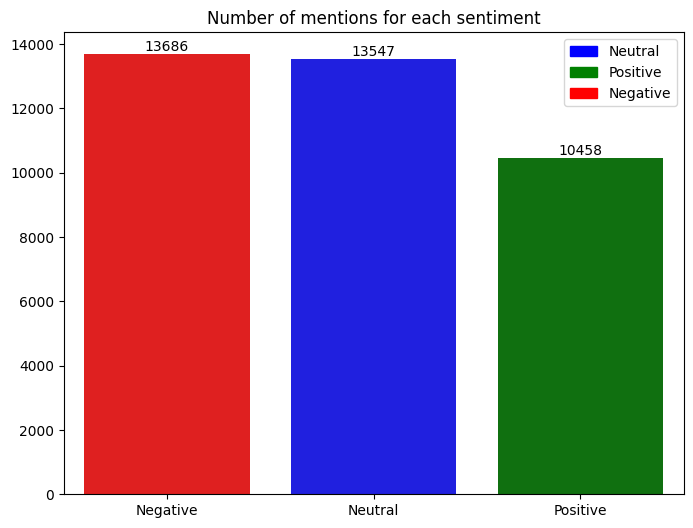

In [44]:
#Plotting number of mentions for each sentiment
# Set the figure size
plt.figure(figsize=(8, 6))
colm = [x  for x in mention_results.columns if x != "Mentions"]
results = [mention_results[x].sum() for x in colm]
plt.title("Number of mentions for each sentiment")
colors = ["red","blue","green"]
ax = sns.barplot(x=colm,y=results,palette=colors)
ax.bar_label(ax.containers[0])
plt.legend(handles =legend_handles )

plt.show()


In [45]:
df['hashtags'].isnull().sum()#Finding the null values in 'hashtags' feature

841

In [46]:
df['hashtags'].fillna("Not Available",inplace=True)#Filling the null values with 'Not Available'

<ipython-input-46-0766930672c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'].fillna("Not Available",inplace=True)#Filling the null values with 'Not Available'


In [47]:
fr = df.loc[df['hashtags'] != 'Not Available']#Fidning the tweets which doesnt have null values
soln  = ''.join(fr['hashtags'])#Converting all the mentions into a single string
soln

'#ActOfGod#SabrimalaTemple #CoronaUpdatesOnBhaskar#CoronaUpdatesOnBhaskar#IndiaChinaBorderTension #Ladakh#SushantSinghRajputDeathCase#China #SoniaGandhi#realmec12 #TecnoSparkPower2Air #smartphones#COVID19 #ByElection #Gwalior#DrugsCase #RheaChakraborty #ShwetaBasu#IPL #DavidMiller #MSDhoni#FactCheck #lockdown#AmitabhBachchan #Alexa#OTTPlatform #IPL2020 #IPL2020#HindiDiwas2020 #HindiDiwas#CoronaUpdatesOnBhaskar #COVID19#school #schoolsreopening #COVID19#DrugsCase #RheaChakraborty #SushantSinghRajput#ElephantDoctor #Assam #DrKushalKonwarSarma#KashmiriPandits#CoronaUpdatesOnBhaskar #Raipur#CoronaUpdatesOnBhaskar #COVID19 #KalyanSingh#Bihar#RaghuvanshPrasadSingh#NEET2020#CoronaUpdatesOnBhaskar #CoronaVaccine#Pokran #Howitzer#CoronaUpdatesOnBhaskar #COVID19#YoshihideSuga #Japan#HindiDiwas2020 #HindiDiwas#POCOM2 #Smartphone #AffordablePhone#classified #classifiedad #onlinebooking #bhaskarad #advertising #appointment #property #matrimonial #automobile #obituary#HindiDiwas2020 #HindiDiwas#Cric

In [48]:
list_vals_2 = soln.split("#")#Splitting the string into a list
list_values = [x.strip() for x in list_vals_2]
hashtags = {}
for i in set(list_values):
  hashtags[i] = soln.count(i)
hashtags_df = pd.DataFrame(list(hashtags.items()),columns=['hashtags','Count']).iloc[1:]
hashtags_df.sort_values(by='Count',ascending=False)


hashtags  Count
7792                  Corona   4908
1014                       9   4048
2246                  Update   2899
1772                   COVID   2679
5957                   India   2513
...                      ...    ...
3880         ShaniShingnapur      1
3879  SiddharthNagarMarriage      1
3876             Yamunanagar      1
3875    vikashDubeyEncounter      1
9045           UniqueWedding      1

[9045 rows x 2 columns]

In [49]:
hashtags_results = pd.DataFrame(columns=['hashtags','Negative','Neutral','Positive'])
hashtags_results["hashtags"] =  hashtags_df.hashtags
#search.groupby('Sentiment')['mentions'].apply(lambda x: x.str.contains(i).sum())
for i in hashtags_df.hashtags:
    # Count the occurrences of each sentiment for the current mention
    count = df.groupby('Sentiment')['hashtags'].apply(lambda x: x.str.contains(i).sum()).reset_index()

    # Assign the count values to the corresponding columns in mention_results
    hashtags_results.loc[hashtags_results['hashtags'] == i, 'Negative'] = count[count['Sentiment'] == 'Negative']['hashtags'].values
    hashtags_results.loc[hashtags_results['hashtags'] == i, 'Neutral'] = count[count['Sentiment'] == 'Neutral']['hashtags'].values
    hashtags_results.loc[hashtags_results['hashtags'] == i, 'Positive'] = count[count['Sentiment'] == 'Positive']['hashtags'].values

print(hashtags_results)


             hashtags Negative Neutral Positive
1      Nishikantkamat        1       0        0
2     SheffieldUnited        0       0        1
3           FreeTrial        0       0        1
4        WasimaSheikh        0       1        0
5          NanaPatole        0       0        1
...               ...      ...     ...      ...
9041              BS6        0       0        1
9042            Sales        1       0        3
9043    bubonicplague        0       0        1
9044       LGPolymers        1       1        0
9045    UniqueWedding        0       1        0

[9045 rows x 4 columns]


In [50]:
#Finding the hashtags which had highest count for each sentiment
hashtags_results['Positive'] = pd.to_numeric(hashtags_results['Positive'], errors='coerce')
hashtags_results['Negative'] = pd.to_numeric(hashtags_results['Negative'], errors='coerce')
hashtags_results['Neutral'] = pd.to_numeric(hashtags_results['Neutral'], errors='coerce')

print("The hashtag with highest count on positive sentiment is",hashtags_results.loc[hashtags_results['Positive'].idxmax()].hashtags,"with hashtag count ",hashtags_results.loc[hashtags_results['Positive'].idxmax()].Positive)
print("The hashtag with highest count on negative sentiment is",hashtags_results.loc[hashtags_results['Negative'].idxmax()].hashtags,"with hashtag count ",hashtags_results.loc[hashtags_results['Negative'].idxmax()].Negative)
print("The hashtag with highest count on neutral sentiment is",hashtags_results.loc[hashtags_results['Neutral'].idxmax()].hashtags,"with hashtag count ",hashtags_results.loc[hashtags_results['Neutral'].idxmax()].Neutral)

The hashtag with highest count on positive sentiment is 9 with hashtag count  1091
The hashtag with highest count on negative sentiment is Corona with hashtag count  1253
The hashtag with highest count on neutral sentiment is Corona with hashtag count  1930


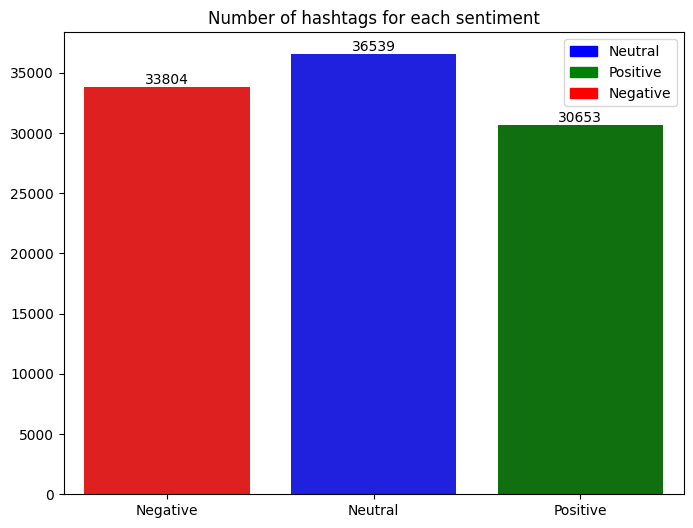

In [51]:
#Plotting the number of hashtags for each sentiment
# Set the figure size
plt.figure(figsize=(8, 6))
colm = [x  for x in hashtags_results.columns if x != "hashtags"]
results = [hashtags_results[x].sum() for x in colm]
colors = ["red","blue","green"]
ax = sns.barplot(x=colm,y=results,palette = colors)




ax.bar_label(ax.containers[0])
plt.title("Number of hashtags for each sentiment")
plt.legend(handles =legend_handles )
plt.show()


<ipython-input-52-d1271d208898>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


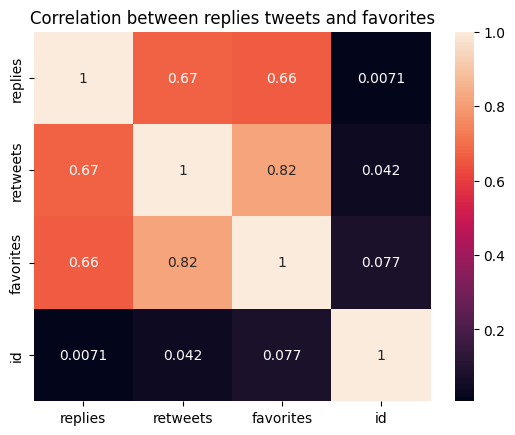

In [52]:
#Finding the correlation between favorites,retweets,replies
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between replies tweets and favorites")
plt.show()

**Inference: There is a strong positive correlation between replies features and favorites**

In [53]:
mention_results

Mentions  Negative  Neutral  Positive
1        soundarya_20         0        1         0
2          laurawbush         0        0         1
3     anuragkashyap72         8        3         2
4     cricketworldcup         7        2        20
5       JNUSUofficial         4        0         0
...               ...       ...      ...       ...
2699   ForceGurkha4x4         0        0         1
2700     LaghateParth         2        0         0
2701       BalrajSyal         0        0         1
2702        MFA_China         1        0         0
2703     KiritSomaiya         1        1         0

[2703 rows x 4 columns]

In [54]:
#Finding the total favorites,retweets and replies for every mention and sorting the data based on these
for i in mention_results.Mentions:


   fav = df.loc[df['mentions'].str.contains(i)]
   mention_results.loc[mention_results['Mentions'] == i, 'favorites'] = fav['favorites'].sum()
   mention_results.loc[mention_results['Mentions'] == i, 'retweets'] = fav['retweets'].sum()
   mention_results.loc[mention_results['Mentions'] == i, 'replies'] = fav['replies'].sum()

print("The 5 mentions with most number of favorites are:\n", mention_results.sort_values(by="favorites",ascending=False).head(5))
print("\nThe 5 mentions with most number of retweets are:\n",mention_results.sort_values(by="retweets",ascending=False).head(5))
print("\nThe 5 mentions with most number of replies are:\n",mention_results.sort_values(by="replies",ascending=False).head(5))




The 5 mentions with most number of favorites are:
           Mentions  Negative  Neutral  Positive  favorites  retweets  replies
288       PMOIndia       767      788       677   308831.0   42918.0  16499.0
2542  narendramodi       263      358       435   149353.0   16670.0   8726.0
24     MoHFW_INDIA       464      598       334   119156.0   16206.0   4331.0
1063   RahulGandhi       260      196       129    83959.0   11400.0   6162.0
1136      INCIndia       215      227       120    82086.0   10132.0   6779.0

The 5 mentions with most number of retweets are:
           Mentions  Negative  Neutral  Positive  favorites  retweets  replies
288       PMOIndia       767      788       677   308831.0   42918.0  16499.0
2542  narendramodi       263      358       435   149353.0   16670.0   8726.0
24     MoHFW_INDIA       464      598       334   119156.0   16206.0   4331.0
1063   RahulGandhi       260      196       129    83959.0   11400.0   6162.0
1136      INCIndia       215      227   

In [55]:
#Soting top 10 mentions with respective to number of Favorites,Counts and Replies
import plotly.graph_objects as go

# Sort the mention_results dataframe by favorites, retweets, and replies
sorted_by_favorites = mention_results.sort_values(by="favorites", ascending=False).head(10)
sorted_by_retweets = mention_results.sort_values(by="retweets", ascending=False).head(10)
sorted_by_replies = mention_results.sort_values(by="replies", ascending=False).head(10)

# Create the bar plot for favorites
fig_favorites = go.Figure(data=[go.Bar(x=sorted_by_favorites['Mentions'], y=sorted_by_favorites['favorites'])])
fig_favorites.update_layout(title="Mentions vs Favorites (Top 10)", xaxis_title="Mentions", yaxis_title="Favorites")
fig_favorites.update_xaxes(tickangle=45)
fig_favorites.update_traces(texttemplate='%{y}', textposition='auto')
fig_favorites.show()

# Create the bar plot for retweets
fig_retweets = go.Figure(data=[go.Bar(x=sorted_by_retweets['Mentions'], y=sorted_by_retweets['retweets'])])
fig_retweets.update_layout(title="Mentions vs Retweets (Top 10)", xaxis_title="Mentions", yaxis_title="Retweets")
fig_retweets.update_xaxes(tickangle=45)
fig_retweets.update_traces(texttemplate='%{y}', textposition='auto')
fig_retweets.show()

# Create the bar plot for replies
fig_replies = go.Figure(data=[go.Bar(x=sorted_by_replies['Mentions'], y=sorted_by_replies['replies'])])
fig_replies.update_layout(title="Mentions vs Replies (Top 10)", xaxis_title="Mentions", yaxis_title="Replies")
fig_replies.update_xaxes(tickangle=45)
fig_replies.update_traces(texttemplate='%{y}', textposition='auto')
fig_replies.show()


In [56]:

for i in hashtags_results.hashtags:


   ht = df.loc[df['hashtags'].str.contains(i)]
   hashtags_results.loc[hashtags_results['hashtags'] == i, 'favorites'] = ht['favorites'].sum()
   hashtags_results.loc[hashtags_results['hashtags'] == i, 'retweets'] = ht['retweets'].sum()
   hashtags_results.loc[hashtags_results['hashtags'] == i, 'replies'] = ht['replies'].sum()



print("The 5 hashtags with most number of favorites are:\n",hashtags_results.sort_values(by="favorites",ascending=False).head(5))
print("\nThe 5 hashtags with most number of retweets are:\n",hashtags_results.sort_values(by="retweets",ascending=False).head(5))
print("\nThe 5 hashtags with most number of replies are:\n",hashtags_results.sort_values(by="replies",ascending=False).head(5))

The 5 hashtags with most number of favorites are:
      hashtags  Negative  Neutral  Positive  favorites  retweets  replies
7792   Corona      1253     1930      1040   377440.0   51817.0  15593.0
1014        9      1105     1676      1091   338877.0   45641.0  14412.0
2246   Update       811     1359       717   229295.0   29844.0   7345.0
5957    India       699      784       793   219554.0   28028.0   7887.0
1772    COVID       746     1246       660   213793.0   30046.0   9146.0

The 5 hashtags with most number of retweets are:
      hashtags  Negative  Neutral  Positive  favorites  retweets  replies
7792   Corona      1253     1930      1040   377440.0   51817.0  15593.0
1014        9      1105     1676      1091   338877.0   45641.0  14412.0
1772    COVID       746     1246       660   213793.0   30046.0   9146.0
2246   Update       811     1359       717   229295.0   29844.0   7345.0
5957    India       699      784       793   219554.0   28028.0   7887.0

The 5 hashtags with m

In [57]:
#Soting top 10 hashtags with respective to number of Favorites,Counts and Replies


# Sort the hashtags_results dataframe by favorites, retweets, and replies
sorted_by_favorites = hashtags_results.sort_values(by="favorites", ascending=False).head(10)
sorted_by_retweets = hashtags_results.sort_values(by="retweets", ascending=False).head(10)
sorted_by_replies = hashtags_results.sort_values(by="replies", ascending=False).head(10)

# Create the bar plot for favorites
fig_favorites = go.Figure(data=[go.Bar(x=sorted_by_favorites['hashtags'], y=sorted_by_favorites['favorites'])])
fig_favorites.update_layout(title="Hashtags vs Favorites (Top 10)", xaxis_title="Hashtags", yaxis_title="Favorites")
fig_favorites.update_xaxes(tickangle=60)
fig_favorites.update_traces(texttemplate='%{y}', textposition='auto')
fig_favorites.show()

# Create the bar plot for retweets
fig_retweets = go.Figure(data=[go.Bar(x=sorted_by_retweets['hashtags'], y=sorted_by_retweets['retweets'])])
fig_retweets.update_layout(title="Hashtags vs Retweets (Top 10)", xaxis_title="Hashtags", yaxis_title="Retweets")
fig_retweets.update_xaxes(tickangle=60)
fig_retweets.update_traces(texttemplate='%{y}', textposition='auto')
fig_retweets.show()

# Create the bar plot for replies
fig_replies = go.Figure(data=[go.Bar(x=sorted_by_replies['hashtags'], y=sorted_by_replies['replies'])])
fig_replies.update_layout(title="Hashtags vs Replies (Top 10)", xaxis_title="Hashtags", yaxis_title="Replies")
fig_replies.update_xaxes(tickangle=60)
fig_replies.update_traces(texttemplate='%{y}', textposition='auto')
fig_replies.show()


In [58]:
#We are creating anew feature 'impact' which gives the total impact and denotes whether the tweet had an overall positive or negative sentiment
mention_results['impact'] = mention_results['Negative'] * -1 + mention_results['Positive']
hashtags_results['impact'] = hashtags_results['Negative'] * -1 + hashtags_results['Positive']

In [59]:
print("The Mention with most Positive sentiment is ",mention_results.loc[mention_results['impact'].idxmax()].Mentions)
print("The Mention with most Negative sentiment is ",mention_results.loc[mention_results['impact'].idxmin()].Mentions)
print("The Hashtag with most Positive sentiment is ",hashtags_results.loc[hashtags_results['impact'].idxmax()].hashtags)
print("The Hashtag with most Negative sentiment is ",hashtags_results.loc[hashtags_results['impact'].idxmin()].hashtags)

The Mention with most Positive sentiment is  narendramodi
The Mention with most Negative sentiment is  DelhiPolice
The Hashtag with most Positive sentiment is  Tea
The Hashtag with most Negative sentiment is  Corona


In [60]:
#Getting the hashtags with number of tweets > 500
hashtags_results['Total'] = hashtags_results['Positive'] + hashtags_results['Negative'] + hashtags_results['Neutral']
high_count_hashtags = hashtags_results.loc[hashtags_results['Total'] > 1000,['hashtags','Total']]
high_count_hashtags


hashtags  Total
63             CoronaUpdates   2180
333              Coronavirus   1010
1014                       9   3872
1772                   COVID   2652
2246                  Update   2887
3625                 COVID19   2324
3909                  corona   1443
4473  CoronaUpdatesOnBhaskar   1633
5957                   India   2276
7451                   india   1271
7461            CoronaUpdate   2328
7792                  Corona   4223
8818                Lockdown   1182
8830                  COVID1   2325
8867             coronavirus   1107

In [61]:
#Getting the mentions with number of tweets > 500

mention_results['Total'] = mention_results['Positive'] + mention_results['Negative'] +mention_results['Neutral']
high_count_mentions = mention_results.loc[mention_results['Total'] > 500,['Mentions','Total']]
high_count_mentions


Mentions  Total
24       MoHFW_INDIA   1396
288         PMOIndia   2232
742    ashokgehlot51    561
1004        AmitShah    583
1063     RahulGandhi    585
1136        INCIndia    562
1170  drharshvardhan    613
1452  ArvindKejriwal    531
1558             WHO   1016
1726           adgpi    532
1757  ChouhanShivraj    810
2542    narendramodi   1056

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1)

# Add bar plots for hashtags and mentions
fig.add_trace(
    go.Bar(x=high_count_hashtags['hashtags'], y=high_count_hashtags['Total'], name='Hashtags', text=high_count_hashtags['Total'], textposition='auto'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=high_count_mentions['Mentions'], y=high_count_mentions['Total'], name='Mentions', text=high_count_mentions['Total'], textposition='auto'),
    row=2, col=1
)

# Set the y-axis range for each subplot
fig.update_yaxes(range=[0, max(high_count_hashtags['Total'].max(), high_count_mentions['Total'].max()) * 1.1], row=1, col=1)
fig.update_yaxes(range=[0, max(high_count_hashtags['Total'].max(), high_count_mentions['Total'].max()) * 1.1], row=2, col=1)

# Update layout
fig.update_layout(
    title='Hashtag and Mention Counts',
    xaxis_title='Hashtags',
    xaxis2_title='Mentions',
    yaxis_title='Count',
    yaxis2_title='Count',
    height=600,
    width=800,
    showlegend=True
)

# Show the figure
fig.show()


In [63]:
from IPython.display import HTML#To display Powerbi Report

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install nbconvert


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g

In [ ]:
from nbconvert import PDFExporter
import nbformat

# Load the notebook file
with open('example.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Configure the PDFExporter
pdf_exporter = PDFExporter()

# Convert the notebook to PDF
pdf_data, _ = pdf_exporter.from_notebook_node(nb)

# Save the PDF to a file
with open('example.pdf', 'wb') as f:
    f.write(pdf_data)


**We are doing further analysis on the Sentiments using Power BI. We have filtered and analysed day wise to understand the distribution of the tweets of working day and weekends.**

In [64]:
html_code = '''
<iframe title="Hindi_Tweets_Sentiment_Analysis" width="1240" height="741.25" src="https://app.powerbi.com/reportEmbed?reportId=cce70edd-1ab0-480f-ae9c-424cc3b0e03c&autoAuth=true&ctid=a2f9e9d0-fdf5-4a4b-a5f9-391ffaee22f1" frameborder="0" allowFullScreen="true"></iframe>
'''

display(HTML(html_code))

**Inference:** 

*   **The  most number of tweets with Negative sentiment came more on Thursday, while for most Positive Sentiment was on Sunday and Neutral Sentiment was on Monday.**
*   **The most number of tweets came on Thursday follwed by Monday and Tuesday. We can notice that the number of tweets reduces as we approaches the weekend days like Friday,Saturday and Sunday with Friday being the day having less number of tweets**


*   **The number of favorites is highest for tweets with neutral sentiment while the number of replies and retweets is highest for tweets with Negative sentiment.**
* **Considering date-wise the number of twwets are high from 5-10 of the month while it decreases as we reach the end of an month**


*   **As we can see as the time passes number of tweets have increased for every Sentiment from October 2019 to October 2020.**








PS: If you are not able to view the report pls go to https://app.powerbi.com/reportEmbed?reportId=cce70edd-1ab0-480f-ae9c-424cc3b0e03c&autoAuth=true&ctid=a2f9e9d0-fdf5-4a4b-a5f9-391ffaee22f1